In [ ]:
import os
import json
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp
import joblib

# If running in Colab with Drive:
from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = "datahack/p05"
ARTIFACTS_DIR = "artifacts_p05"

os.makedirs(ARTIFACTS_DIR, exist_ok=True)

print("Current working dir:", os.getcwd())
print("Data dir:", DATA_DIR)
print("Artifacts dir:", ARTIFACTS_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working dir: /content
Data dir: datahack/p05
Artifacts dir: artifacts_p05


In [ ]:
import pandas as pd

# Path to your dataset inside Drive
file_path = '/content/logs.csv'

# Read the dataset
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,timestamp,level,service,user_id
0,2025-03-08T02:12:00,INFO,auth,1246
1,2025-03-21T23:04:00,INFO,frontend,469
2,2025-03-09T22:47:00,INFO,auth,2
3,2025-03-27T08:34:00,ERROR,auth,834
4,2025-03-12T04:33:00,INFO,db,824


# Task
Perform an Exploratory Data Analysis (EDA) on the `/content/logs.csv` dataset to understand its structure, identify patterns, and extract insights. This includes displaying basic information about the dataset, analyzing categorical features ('level', 'service'), investigating user IDs, processing and analyzing timestamp data to extract time-based features and visualize activity trends, and finally, summarizing key findings from the analysis.

In [ ]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  60000 non-null  object
 1   level      60000 non-null  object
 2   service    60000 non-null  object
 3   user_id    60000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB

Descriptive Statistics:
                  timestamp  level service       user_id
count                 60000  60000   60000  60000.000000
unique                33117      3       5           NaN
top     2025-03-26T02:34:00   INFO     api           NaN
freq                      8  50903   12068           NaN
mean                    NaN    NaN     NaN    747.219517
std                     NaN    NaN     NaN    432.298996
min                     NaN    NaN     NaN      1.000000
25%                     NaN    NaN     NaN    372.000000
50%                     NaN    NaN     NaN    745.0000

To analyze the categorical features 'level' and 'service', I will first import `matplotlib.pyplot` and `seaborn` for visualization. Then, for each column, I will calculate and display its value counts to understand the frequency of each category. Following this, I will create and display a bar plot to visually represent these distributions, ensuring proper labels and titles for clarity.


Value counts for 'level' column:
level
INFO     50903
WARN      5987
ERROR     3110
Name: count, dtype: int64


/tmp/ipython-input-4256104126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=df, palette='viridis')


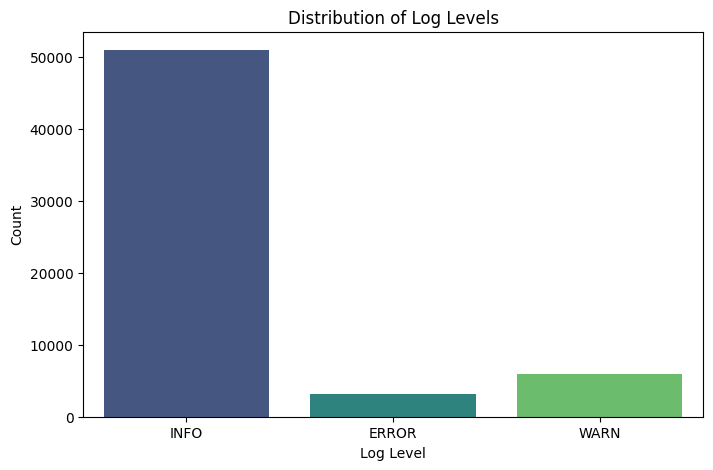


Value counts for 'service' column:
service
api         12068
auth        12049
frontend    12026
payments    11957
db          11900
Name: count, dtype: int64


/tmp/ipython-input-4256104126.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service', data=df, palette='magma')


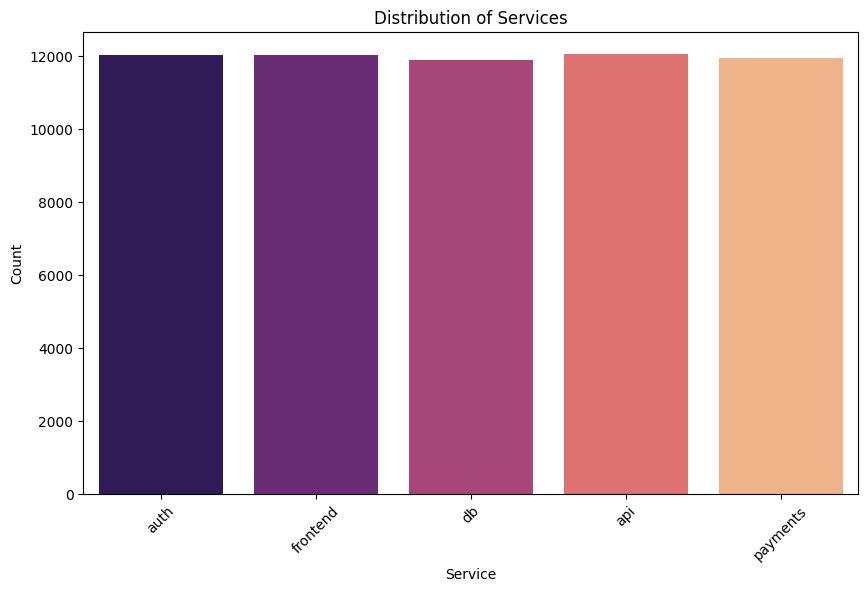

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calculate and print the value counts for the 'level' column.
print("\nValue counts for 'level' column:")
print(df['level'].value_counts())

# 3. Create a bar plot to visualize the distribution of the 'level' column.
plt.figure(figsize=(8, 5))
sns.countplot(x='level', data=df, palette='viridis')
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.show()

# 5. Calculate and print the value counts for the 'service' column.
print("\nValue counts for 'service' column:")
print(df['service'].value_counts())

# 6. Create a bar plot to visualize the distribution of the 'service' column.
plt.figure(figsize=(10, 6))
sns.countplot(x='service', data=df, palette='magma')
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because the `palette` argument was used without assigning `hue` in `seaborn.countplot`. To address this, I will modify the `sns.countplot` calls to explicitly set `hue` to the x-variable and `legend=False` to align with the recommended usage in the warning.




Value counts for 'level' column:
level
INFO     50903
WARN      5987
ERROR     3110
Name: count, dtype: int64


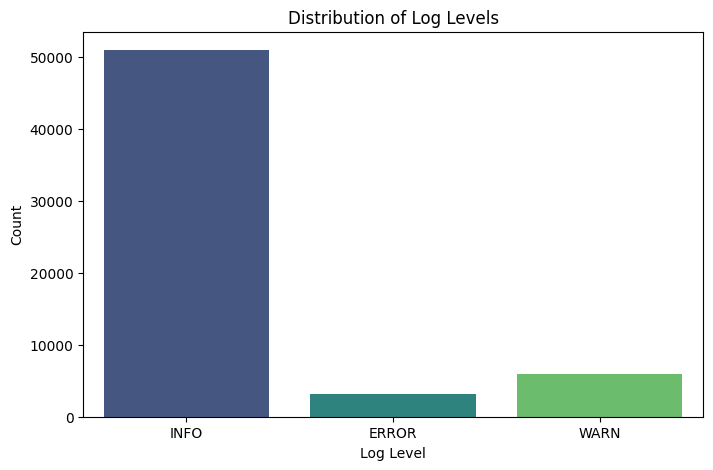


Value counts for 'service' column:
service
api         12068
auth        12049
frontend    12026
payments    11957
db          11900
Name: count, dtype: int64


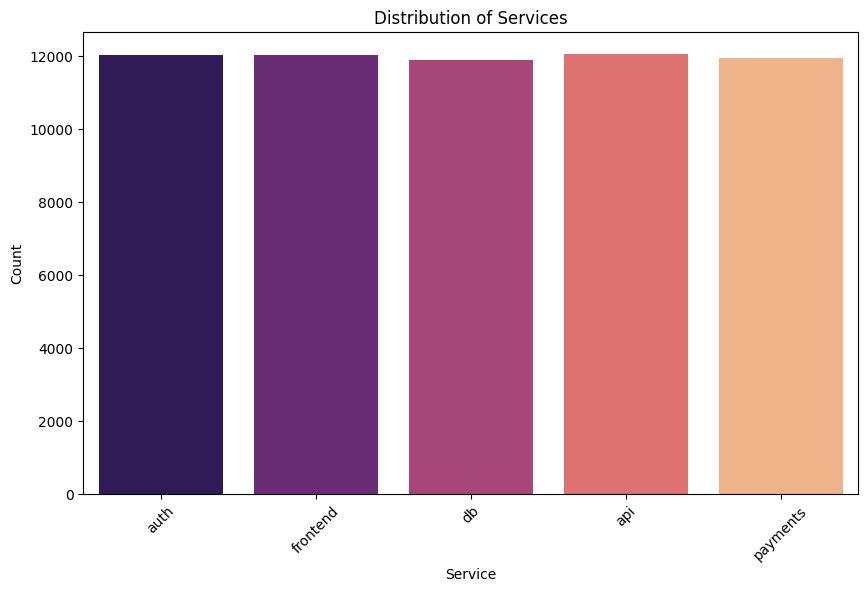

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calculate and print the value counts for the 'level' column.
print("\nValue counts for 'level' column:")
print(df['level'].value_counts())

# 3. Create a bar plot to visualize the distribution of the 'level' column.
plt.figure(figsize=(8, 5))
sns.countplot(x='level', data=df, palette='viridis', hue='level', legend=False)
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.show()

# 5. Calculate and print the value counts for the 'service' column.
print("\nValue counts for 'service' column:")
print(df['service'].value_counts())

# 6. Create a bar plot to visualize the distribution of the 'service' column.
plt.figure(figsize=(10, 6))
sns.countplot(x='service', data=df, palette='magma', hue='service', legend=False)
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Analyze User IDs

### Subtask:
Investigate the 'user_id' column to understand the number of unique users and the frequency of logs per user. Identify the top users with the most logs.


In [ ]:
print(f"Total number of unique users: {df['user_id'].nunique()}")

user_log_counts = df['user_id'].value_counts()
print("\nFrequency of logs per user (top 10):\n", user_log_counts.head(10))

print("\nTop 10 users with the most logs:\n", user_log_counts.head(10))

Total number of unique users: 1499

Frequency of logs per user (top 10):
 user_id
894     59
1202    59
598     59
1072    59
1177    58
1089    57
140     57
1347    57
1193    56
996     56
Name: count, dtype: int64

Top 10 users with the most logs:
 user_id
894     59
1202    59
598     59
1072    59
1177    58
1089    57
140     57
1347    57
1193    56
996     56
Name: count, dtype: int64


/tmp/ipython-input-2748839022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_log_counts.head(10).index, y=user_log_counts.head(10).values, palette='viridis')


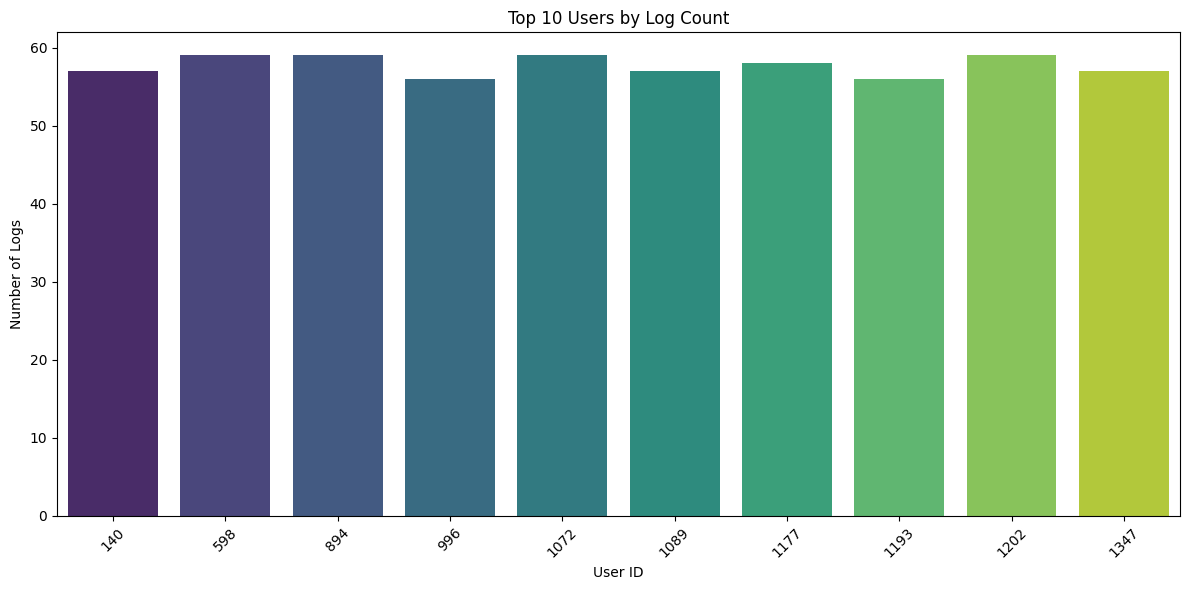

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the top 10 users by their log count
plt.figure(figsize=(12, 6))
sns.barplot(x=user_log_counts.head(10).index, y=user_log_counts.head(10).values, palette='viridis')
plt.title('Top 10 Users by Log Count')
plt.xlabel('User ID')
plt.ylabel('Number of Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

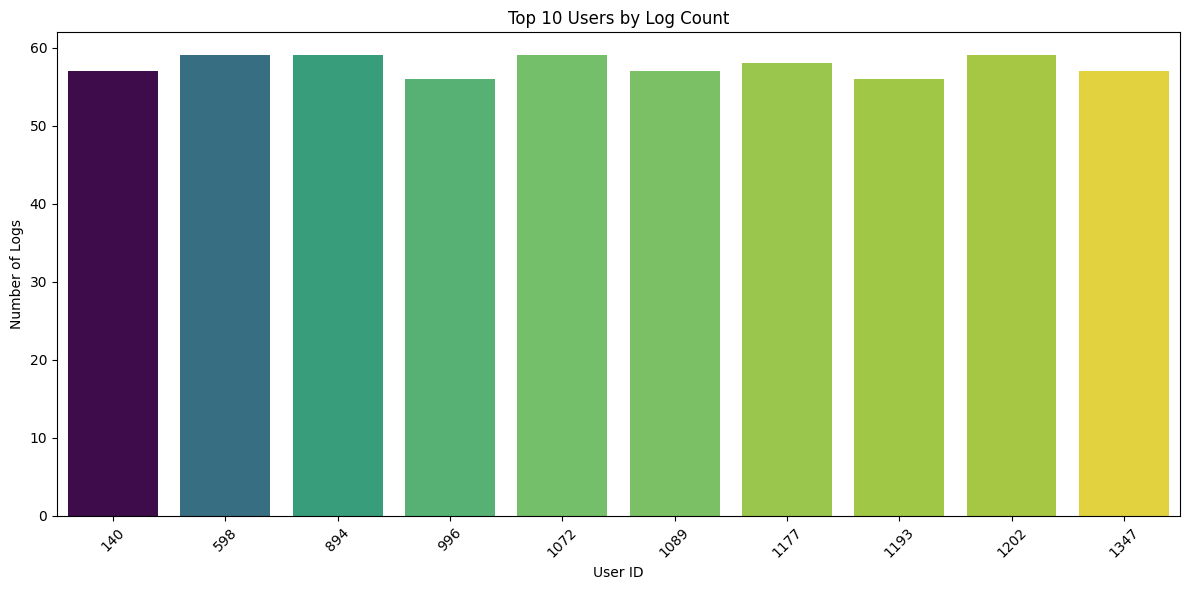

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the top 10 users by their log count
plt.figure(figsize=(12, 6))
sns.barplot(x=user_log_counts.head(10).index, y=user_log_counts.head(10).values, palette='viridis', hue=user_log_counts.head(10).index, legend=False)
plt.title('Top 10 Users by Log Count')
plt.xlabel('User ID')
plt.ylabel('Number of Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Process and Analyze Timestamps

### Subtask:
Convert the 'timestamp' column to datetime objects. Extract time-based features like hour of day, day of week, and day of month. Analyze log frequency across these time dimensions.


In [ ]:
import pandas as pd

# 1. Convert 'timestamp' to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract hour of day
df['hour_of_day'] = df['timestamp'].dt.hour

# 3. Extract day of week
df['day_of_week'] = df['timestamp'].dt.day_name()

# 4. Extract day of month
df['day_of_month'] = df['timestamp'].dt.day

# 5. Calculate and print value counts for 'hour_of_day'
print("\nValue counts for 'hour_of_day':")
print(df['hour_of_day'].value_counts().sort_index())

# 6. Calculate and print value counts for 'day_of_week' (ordered chronologically)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print("\nValue counts for 'day_of_week':")
print(df['day_of_week'].value_counts().reindex(day_order))

# 7. Calculate and print value counts for 'day_of_month'
print("\nValue counts for 'day_of_month':")
print(df['day_of_month'].value_counts().sort_index())


Value counts for 'hour_of_day':
hour_of_day
0     2484
1     2536
2     2595
3     2485
4     2442
5     2474
6     2395
7     2524
8     2599
9     2565
10    2517
11    2490
12    2584
13    2502
14    2431
15    2477
16    2464
17    2509
18    2435
19    2373
20    2500
21    2572
22    2550
23    2497
Name: count, dtype: int64

Value counts for 'day_of_week':
day_of_week
Monday       9633
Tuesday      7707
Wednesday    7809
Thursday     7708
Friday       7787
Saturday     9628
Sunday       9728
Name: count, dtype: int64

Value counts for 'day_of_month':
day_of_month
1     1892
2     1963
3     1934
4     1944
5     1986
6     1873
7     1941
8     1924
9     1910
10    1852
11    1890
12    1918
13    1921
14    1958
15    1895
16    1967
17    1916
18    1953
19    1950
20    1966
21    1950
22    1935
23    1934
24    1954
25    1920
26    1955
27    1948
28    1938
29    1982
30    1954
31    1977
Name: count, dtype: int64


## Visualize Time-based Trends

### Subtask:
Generate plots to visualize the log activity over time, specifically showing the distribution of logs by hour of the day and day of the week. Include appropriate legends for clarity.


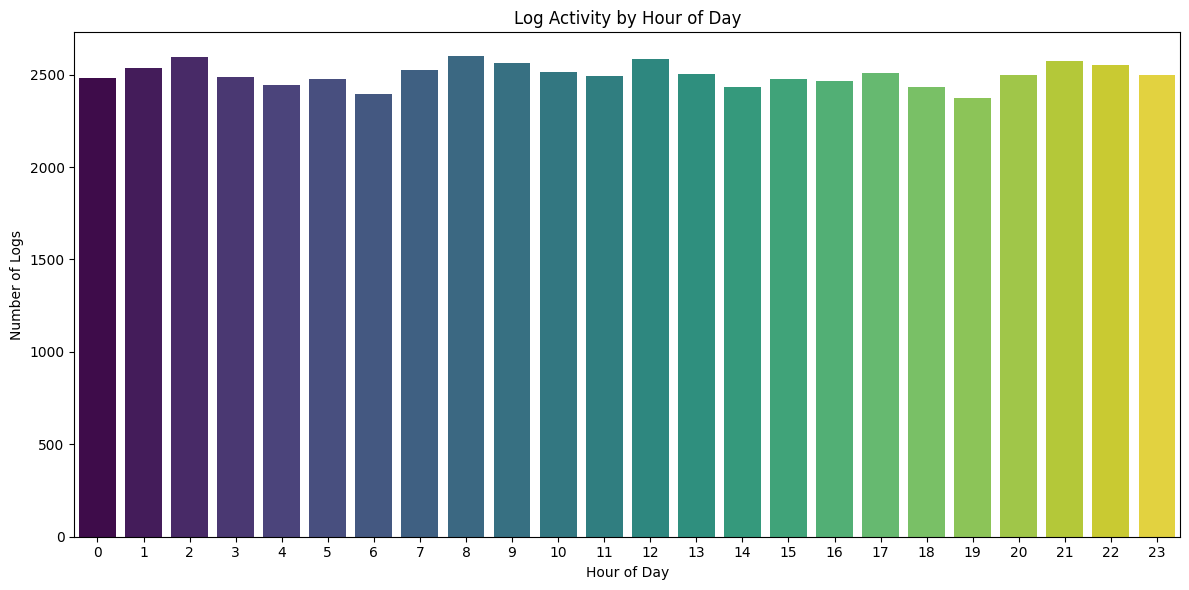

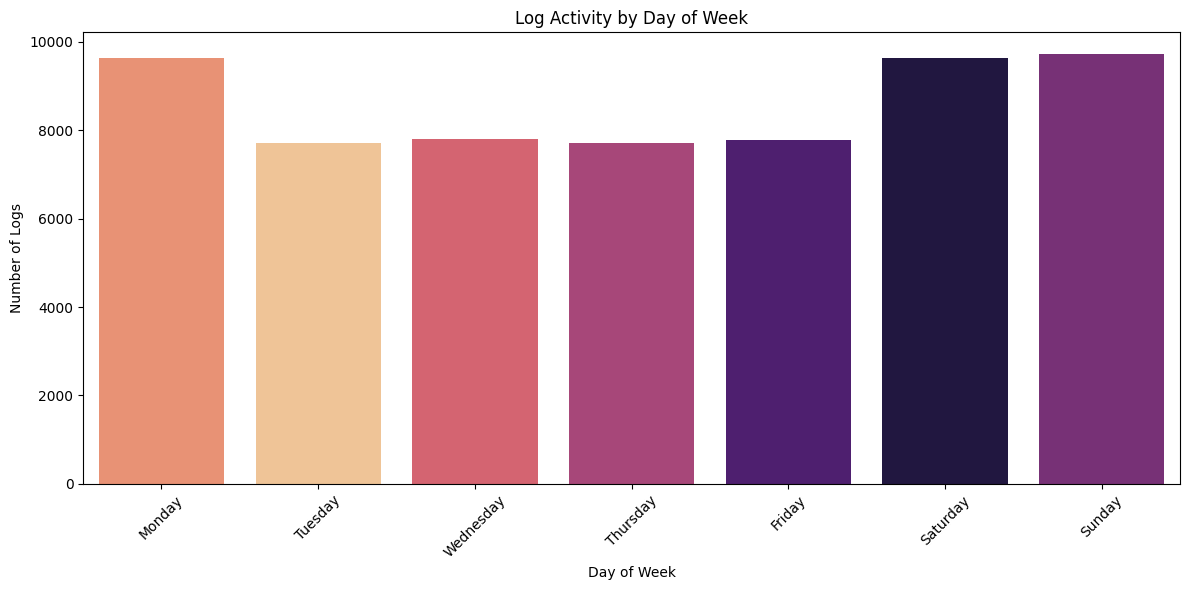

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a bar plot for 'hour_of_day'
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', data=df, palette='viridis', hue='hour_of_day', legend=False)
plt.title('Log Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Create a bar plot for 'day_of_week' (ordered chronologically)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=day_order, palette='magma', hue='day_of_week', legend=False)
plt.title('Log Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Error Patterns by Service

### Subtask:
Filter the dataset to include only log entries where the 'level' is 'ERROR'. Calculate the frequency of 'ERROR' logs for each 'service' and visualize this distribution using a bar plot to identify services with the highest number of errors.



Frequency of ERROR logs per service:
service
db          635
auth        633
api         633
frontend    609
payments    600
Name: count, dtype: int64


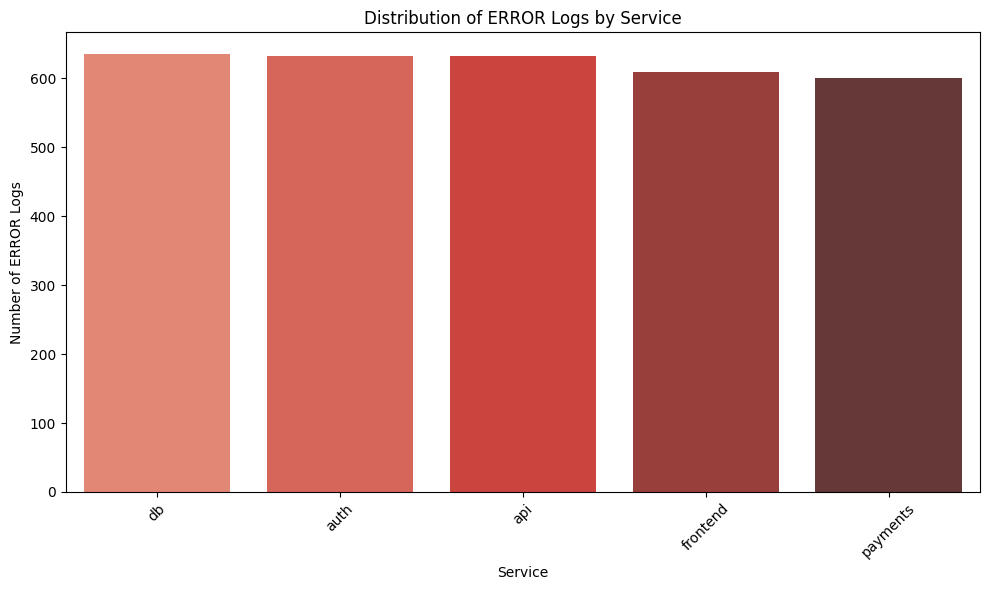

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter the DataFrame to include only 'ERROR' level logs
error_logs_df = df[df['level'] == 'ERROR']

# 2. Calculate the value counts for the 'service' column in error_logs_df
error_service_counts = error_logs_df['service'].value_counts()

# 3. Print the value counts of 'ERROR' logs per service
print("\nFrequency of ERROR logs per service:")
print(error_service_counts)

# 4. Create a bar plot to visualize the distribution of 'ERROR' logs by 'service'
plt.figure(figsize=(10, 6))
sns.barplot(x=error_service_counts.index, y=error_service_counts.values, palette='Reds_d', hue=error_service_counts.index, legend=False)
plt.title('Distribution of ERROR Logs by Service')
plt.xlabel('Service')
plt.ylabel('Number of ERROR Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Frequency of ERROR logs per service:
service
db          635
auth        633
api         633
frontend    609
payments    600
Name: count, dtype: int64


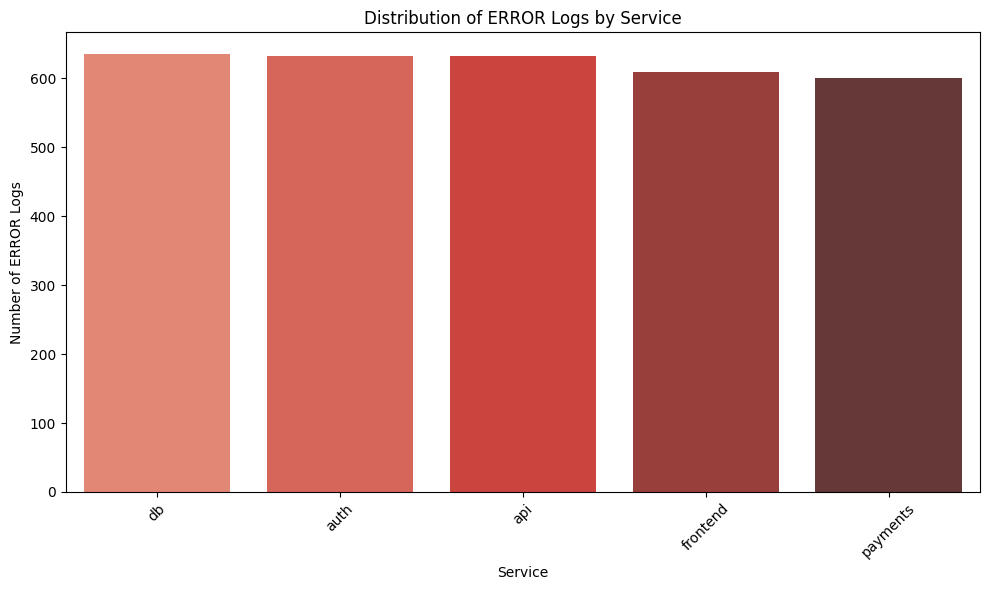

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load df from the CSV and re-apply timestamp transformations
file_path = '/content/logs.csv'
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['day_of_month'] = df['timestamp'].dt.day

# 1. Filter the DataFrame to include only 'ERROR' level logs
error_logs_df = df[df['level'] == 'ERROR']

# 2. Calculate the value counts for the 'service' column in error_logs_df
error_service_counts = error_logs_df['service'].value_counts()

# 3. Print the value counts of 'ERROR' logs per service
print("\nFrequency of ERROR logs per service:")
print(error_service_counts)

# 4. Create a bar plot to visualize the distribution of 'ERROR' logs by 'service'
plt.figure(figsize=(10, 6))
sns.barplot(x=error_service_counts.index, y=error_service_counts.values, palette='Reds_d', hue=error_service_counts.index, legend=False)
plt.title('Distribution of ERROR Logs by Service')
plt.xlabel('Service')
plt.ylabel('Number of ERROR Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Time-based Error Trends

### Subtask:
Calculate the count of 'ERROR' logs per hour of the day, day of the week, and day of the month. Create separate bar plots to visualize these distributions, ensuring chronological order for the days of the week, to identify any specific times or days with increased error activity.



Frequency of ERROR logs per hour of day:
hour_of_day
0     138
1     104
2     143
3     133
4     136
5     131
6     134
7     124
8     118
9     142
10    123
11    143
12    123
13    139
14    122
15    110
16    122
17    150
18    137
19    128
20    119
21    129
22    134
23    128
Name: count, dtype: int64


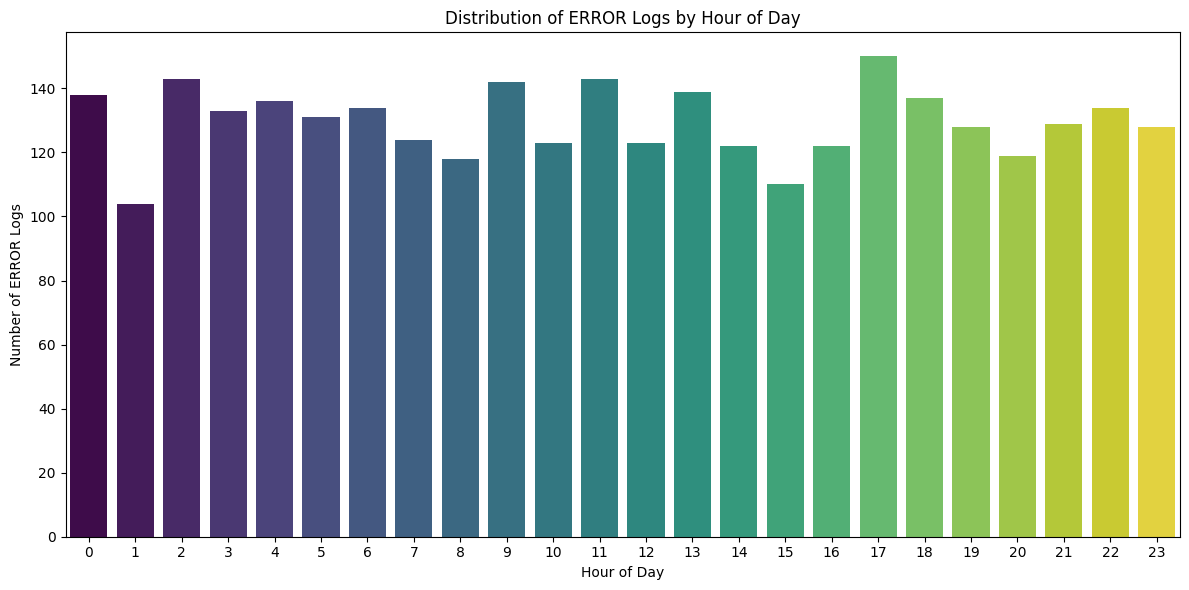


Frequency of ERROR logs per day of week:
day_of_week
Monday       487
Tuesday      413
Wednesday    412
Thursday     409
Friday       408
Saturday     475
Sunday       506
Name: count, dtype: int64


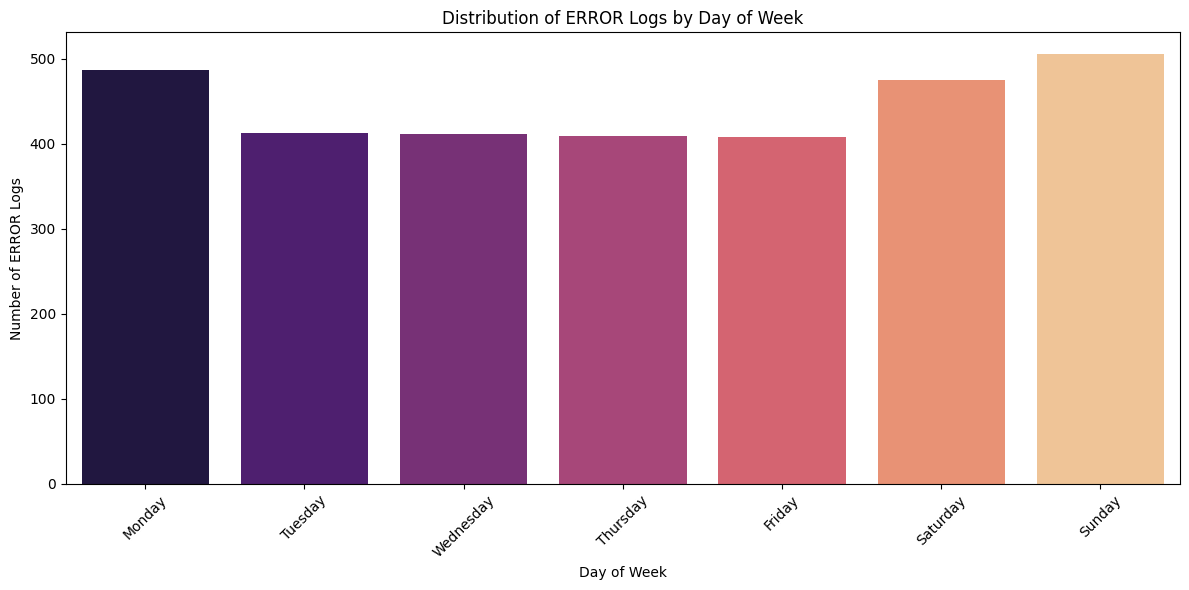


Frequency of ERROR logs per day of month:
day_of_month
1      80
2     100
3     103
4     110
5      99
6     111
7     105
8      91
9      89
10     88
11    103
12    106
13     94
14    105
15    109
16    102
17     83
18     96
19    106
20    102
21    108
22     86
23    107
24    101
25    104
26    101
27    102
28     90
29    109
30    108
31    112
Name: count, dtype: int64


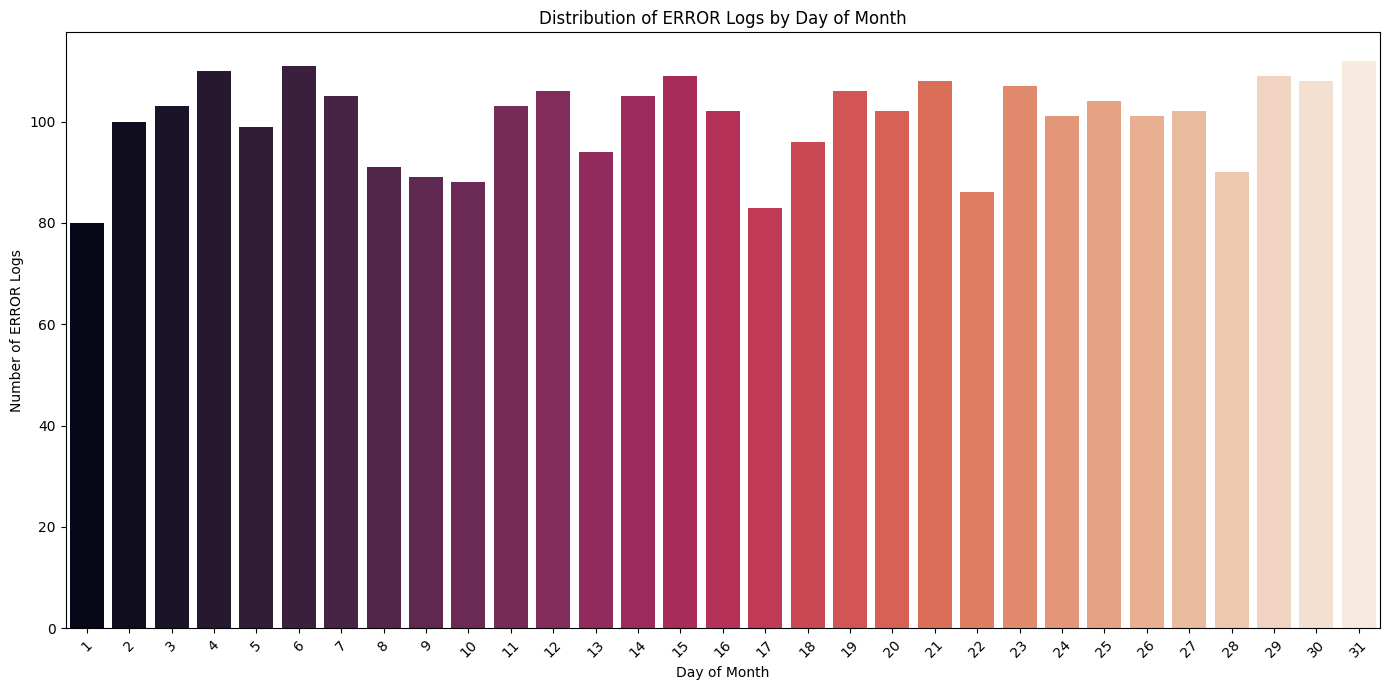

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and print the frequency of 'ERROR' logs per hour of the day
print("\nFrequency of ERROR logs per hour of day:")
error_hour_counts = error_logs_df['hour_of_day'].value_counts().sort_index()
print(error_hour_counts)

# 2. Create a bar plot for 'hour_of_day'
plt.figure(figsize=(12, 6))
sns.barplot(x=error_hour_counts.index, y=error_hour_counts.values, palette='viridis', hue=error_hour_counts.index, legend=False)
plt.title('Distribution of ERROR Logs by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of ERROR Logs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Calculate and print the frequency of 'ERROR' logs for each day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print("\nFrequency of ERROR logs per day of week:")
error_dayofweek_counts = error_logs_df['day_of_week'].value_counts().reindex(day_order)
print(error_dayofweek_counts)

# 4. Create a bar plot for 'day_of_week' (ordered chronologically)
plt.figure(figsize=(12, 6))
sns.barplot(x=error_dayofweek_counts.index, y=error_dayofweek_counts.values, order=day_order, palette='magma', hue=error_dayofweek_counts.index, legend=False)
plt.title('Distribution of ERROR Logs by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of ERROR Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Calculate and print the frequency of 'ERROR' logs for each day of the month
print("\nFrequency of ERROR logs per day of month:")
error_dayofmonth_counts = error_logs_df['day_of_month'].value_counts().sort_index()
print(error_dayofmonth_counts)

# 6. Create a bar plot for 'day_of_month'
plt.figure(figsize=(14, 7))
sns.barplot(x=error_dayofmonth_counts.index, y=error_dayofmonth_counts.values, palette='rocket', hue=error_dayofmonth_counts.index, legend=False)
plt.title('Distribution of ERROR Logs by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of ERROR Logs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summarize Key Findings and Limitations

### Subtask:
Provide a comprehensive summary of the key insights derived from the conducted analyses, including patterns in error distribution by service and over time. Clearly reiterate which aspects of the requested EDA could not be performed due to the absence of specific data columns (e.g., latency, status codes, region).


In [ ]:
def extract_data():
    path = os.path.join(DATA_DIR, "logs.csv")
    df = pd.read_csv(path)
    print(f"✅ Extracted {len(df)} rows from logs.csv")
    return df

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
%cd /content/drive/MyDrive/Hackathon


[Errno 2] No such file or directory: '/content/drive/MyDrive/Hackathon'
/content


NEW

In [ ]:
import os
import json
import pandas as pd
import numpy as np

# Use globally defined DATA_DIR and ARTIFACTS_DIR
# (as confirmed by kernel state and initial setup cells)

# Ensure the artifact directory exists using the globally defined ARTIFACTS_DIR
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

print("Current working dir:", os.getcwd())
print("Data dir:", DATA_DIR)
print("Artifacts dir:", ARTIFACTS_DIR)


Current working dir: /content
Data dir: datahack/p05
Artifacts dir: artifacts_p05


In [ ]:
import os
import json
import pandas as pd
import numpy as np

# Use globally defined DATA_DIR and ARTIFACTS_DIR
# (as confirmed by kernel state and initial setup cells)

# Ensure the artifact directory exists using the globally defined ARTIFACTS_DIR
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

print("Current working dir:", os.getcwd())
print("Data dir:", DATA_DIR)
print("Artifacts dir:", ARTIFACTS_DIR)


Current working dir: /content
Data dir: datahack/p05
Artifacts dir: artifacts_p05


In [ ]:
def load_raw_logs(data_dir):
    path = os.path.join(data_dir, "logs.csv")
    df = pd.read_csv(path)
    print(f"✅ Extracted {len(df)} rows from logs.csv")
    return df

def clean_and_aggregate_logs(df_raw: pd.DataFrame) -> pd.DataFrame:
    df = df_raw.copy()

    # Basic cleaning
    df["timestamp_dt"] = pd.to_datetime(df["timestamp"], utc=True, errors="coerce")
    # Drop rows where timestamp or service is missing
    df = df.dropna(subset=["timestamp_dt", "service"])

    # Derived columns
    df["date"] = df["timestamp_dt"].dt.date
    # Define 'is_error' based on 'level' column as a proxy
    df["is_error"] = (df["level"] == 'ERROR').astype(int)

    # Aggregate by service and day
    grouped = (
        df
        .groupby(["service", "date"], as_index=False)
        .agg(
            total_logs=("timestamp", "size"), # Total number of log entries
            error_logs=("is_error", "sum") # Sum of 'ERROR' level logs
        )
    )
    # Calculate error rate as proportion of error logs
    grouped["error_rate"] = grouped["error_logs"] / grouped["total_logs"]

    print(f"✅ Cleaned and aggregated {len(grouped)} rows.")
    return grouped

def save_step1_outputs(df_step1: pd.DataFrame, artifact_dir: str):
    # Save parquet
    step1_path = os.path.join(artifact_dir, "step1.parquet")
    df_step1.to_parquet(step1_path, index=False)
    print(f"✅ Saved aggregated data to {step1_path}")

    # Metrics
    unique_services = df_step1["service"].nunique()
    avg_logs_per_day_per_service = df_step1["total_logs"].mean()

    metrics = {
        "unique_services": int(unique_services),
        "avg_logs_per_day_per_service": float(avg_logs_per_day_per_service)
    }

    metrics_path = os.path.join(artifact_dir, "step1_metrics.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)
    print(f"✅ Saved metrics to {metrics_path}")
    print("Metrics:", metrics)


In [ ]:
# Load raw logs
# Assuming 'logs.csv' is in /content/ based on previous interactions.
# If DATA_DIR is not correctly set for /content/, use the direct path.
# If DATA_DIR is 'datahack/p05' but logs.csv is in '/content/', adjust 'data_dir' argument.
# Based on the kernel state, 'file_path' is '/content/logs.csv'

df_raw = load_raw_logs("/content/") # Use the direct path for logs.csv

# Clean and aggregate logs
df_step1 = clean_and_aggregate_logs(df_raw)

# Save outputs
save_step1_outputs(df_step1, ARTIFACTS_DIR)


✅ Extracted 60000 rows from logs.csv
✅ Cleaned and aggregated 155 rows.
✅ Saved aggregated data to artifacts_p05/step1.parquet
✅ Saved metrics to artifacts_p05/step1_metrics.json
Metrics: {'unique_services': 5, 'avg_logs_per_day_per_service': 387.0967741935484}


In [ ]:
display(df_step1.head())

,service,date,total_logs,error_logs,error_rate
0,api,2025-03-01,381,19,0.049869
1,api,2025-03-02,408,20,0.049020
2,api,2025-03-03,404,20,0.049505
3,api,2025-03-04,406,22,0.054187
4,api,2025-03-05,387,20,0.051680


In [ ]:
def load_raw_logs(data_dir):
    path = os.path.join(data_dir, "logs.csv")
    df = pd.read_csv(path)
    print(f"✅ Extracted {len(df)} rows from logs.csv")
    return df

def clean_and_aggregate_logs(df_raw: pd.DataFrame) -> pd.DataFrame:
    df = df_raw.copy()

    # Basic cleaning
    df["timestamp_dt"] = pd.to_datetime(df["timestamp"], utc=True, errors="coerce")
    # Drop rows where timestamp or service is missing
    df = df.dropna(subset=["timestamp_dt", "service"])

    # Derived columns
    df["date"] = df["timestamp_dt"].dt.date
    # Define 'is_error' based on 'level' column as a proxy
    df["is_error"] = (df["level"] == 'ERROR').astype(int)

    # Aggregate by service and day
    grouped = (
        df
        .groupby(["service", "date"], as_index=False)
        .agg(
            total_logs=("timestamp", "size"), # Total number of log entries
            error_logs=("is_error", "sum") # Sum of 'ERROR' level logs
        )
    )
    # Calculate error rate as proportion of error logs
    grouped["error_rate"] = grouped["error_logs"] / grouped["total_logs"]

    print(f"✅ Cleaned and aggregated {len(grouped)} rows.")
    return grouped

def save_step1_outputs(df_step1: pd.DataFrame, artifact_dir: str):
    # Save parquet
    step1_path = os.path.join(artifact_dir, "step1.parquet")
    df_step1.to_parquet(step1_path, index=False)
    print(f"✅ Saved aggregated data to {step1_path}")

    # Metrics
    unique_services = df_step1["service"].nunique()
    avg_logs_per_day_per_service = df_step1["total_logs"].mean()

    metrics = {
        "unique_services": int(unique_services),
        "avg_logs_per_day_per_service": float(avg_logs_per_day_per_service)
    }

    metrics_path = os.path.join(artifact_dir, "step1_metrics.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)
    print(f"✅ Saved metrics to {metrics_path}")
    print("Metrics:", metrics)


### Execute Cleaning and Aggregation

In [ ]:
# Load raw logs
# Assuming 'logs.csv' is in /content/ based on previous interactions.
# If DATA_DIR is not correctly set for /content/, use the direct path.
# If DATA_DIR is 'datahack/p05' but logs.csv is in '/content/', adjust 'data_dir' argument.
# Based on the kernel state, 'file_path' is '/content/logs.csv'

df_raw = load_raw_logs("/content/") # Use the direct path for logs.csv

# Clean and aggregate logs
df_step1 = clean_and_aggregate_logs(df_raw)

# Save outputs
save_step1_outputs(df_step1, ARTIFACTS_DIR)


✅ Extracted 60000 rows from logs.csv
✅ Cleaned and aggregated 155 rows.
✅ Saved aggregated data to artifacts_p05/step1.parquet
✅ Saved metrics to artifacts_p05/step1_metrics.json
Metrics: {'unique_services': 5, 'avg_logs_per_day_per_service': 387.0967741935484}


### Display Aggregated Data Head

In [ ]:
display(df_step1.head(100))

,service,date,total_logs,error_logs,error_rate
0,api,2025-03-01,381,19,0.049869
1,api,2025-03-02,408,20,0.049020
2,api,2025-03-03,404,20,0.049505
3,api,2025-03-04,406,22,0.054187
4,api,2025-03-05,387,20,0.051680
...,...,...,...,...,...
95,frontend,2025-03-03,381,22,0.057743
96,frontend,2025-03-04,394,20,0.050761
97,frontend,2025-03-05,404,13,0.032178
98,frontend,2025-03-06,380,23,0.060526


## Overall Error Rate by Service Type

In [ ]:
import pandas as pd

# Calculate overall error rate per service from df_step1
service_error_summary = df_step1.groupby('service').agg(
    total_error_logs=('error_logs', 'sum'),
    total_overall_logs=('total_logs', 'sum')
).reset_index()

service_error_summary['overall_error_rate'] = service_error_summary['total_error_logs'] / service_error_summary['total_overall_logs']

# Sort by overall error rate for better readability
service_error_summary = service_error_summary.sort_values(by='overall_error_rate', ascending=False)

print("Overall Error Rate for each Service Type:")
display(service_error_summary)


Overall Error Rate for each Service Type:


,service,total_error_logs,total_overall_logs,overall_error_rate
2,db,635,11900,0.053361
1,auth,633,12049,0.052535
0,api,633,12068,0.052453
3,frontend,609,12026,0.050640
4,payments,600,11957,0.050180


## Comparison: Mean Daily Error Rate vs. Overall Error Rate by Service

Comparison of Overall Error Rate and Mean Daily Error Rate by Service:


,service,overall_error_rate,mean_daily_error_rate
0,db,0.053361,0.053307
1,auth,0.052535,0.052544
2,api,0.052453,0.052479
3,frontend,0.050640,0.050630
4,payments,0.050180,0.050379


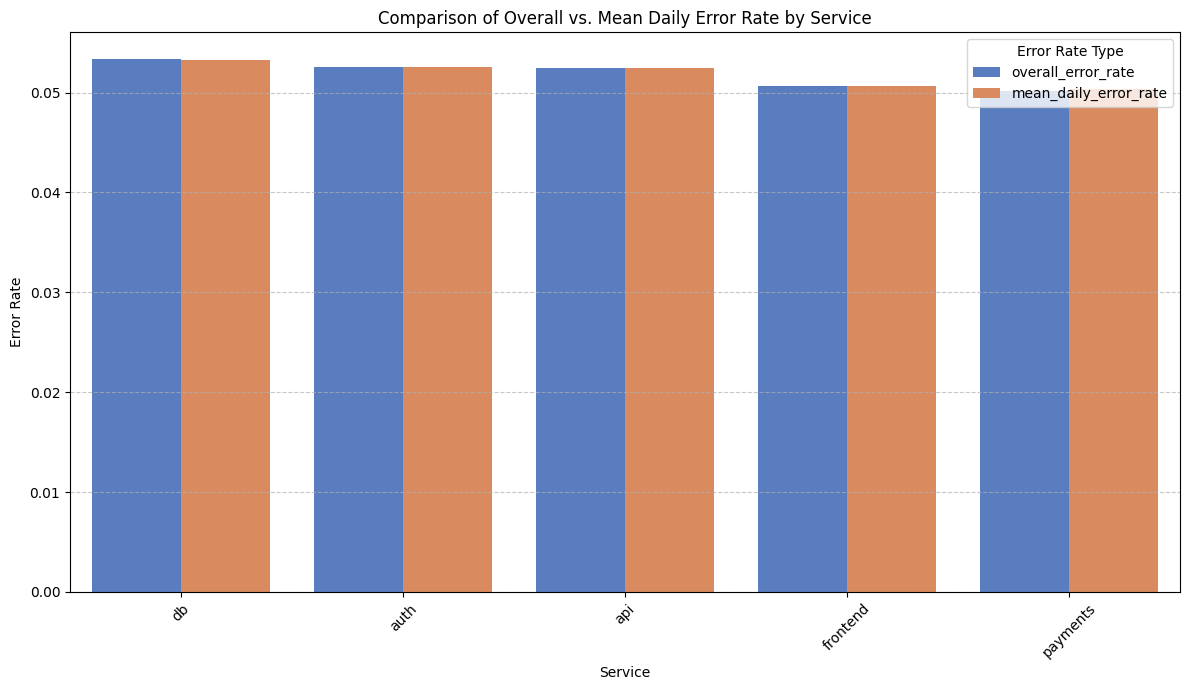

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of the daily error rates for each service type
mean_daily_error_rate_by_service = df_step1.groupby('service')['error_rate'].mean().reset_index()

# Sort for better readability
mean_daily_error_rate_by_service = mean_daily_error_rate_by_service.sort_values(by='error_rate', ascending=False)

# Ensure both dataframes are available. If not, re-run previous cells.
# service_error_summary: contains 'service' and 'overall_error_rate'
# mean_daily_error_rate_by_service: contains 'service' and 'error_rate' (which is mean daily error rate)

# Rename the 'error_rate' column in mean_daily_error_rate_by_service for clarity before merging
mean_daily_error_rate_by_service_renamed = mean_daily_error_rate_by_service.rename(columns={'error_rate': 'mean_daily_error_rate'})

# Merge the two dataframes
error_rate_comparison = pd.merge(
    service_error_summary[['service', 'overall_error_rate']],
    mean_daily_error_rate_by_service_renamed[['service', 'mean_daily_error_rate']],
    on='service'
)

# Display the comparison table
print("Comparison of Overall Error Rate and Mean Daily Error Rate by Service:")
display(error_rate_comparison.sort_values(by='overall_error_rate', ascending=False))

# Prepare data for grouped bar plot (melt the dataframe)
error_rate_comparison_melted = error_rate_comparison.melt(
    id_vars=['service'],
    var_name='Error_Type',
    value_name='Error_Rate'
)

# Create the grouped bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='service', y='Error_Rate', hue='Error_Type', data=error_rate_comparison_melted, palette='muted')
plt.title('Comparison of Overall vs. Mean Daily Error Rate by Service')
plt.xlabel('Service')
plt.ylabel('Error Rate')
plt.xticks(rotation=45)
plt.legend(title='Error Rate Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Mean Daily Error Rate for Each Service Type

In [ ]:
import pandas as pd

# Calculate the mean of the daily error rates for each service type
mean_daily_error_rate_by_service = df_step1.groupby('service')['error_rate'].mean().reset_index()

# Sort for better readability
mean_daily_error_rate_by_service = mean_daily_error_rate_by_service.sort_values(by='error_rate', ascending=False)

print("Mean Daily Error Rate for each Service Type:")
display(mean_daily_error_rate_by_service)


Mean Daily Error Rate for each Service Type:


,service,error_rate
2,db,0.053307
1,auth,0.052544
0,api,0.052479
3,frontend,0.050630
4,payments,0.050379


### Visualization of Overall Error Rate by Service

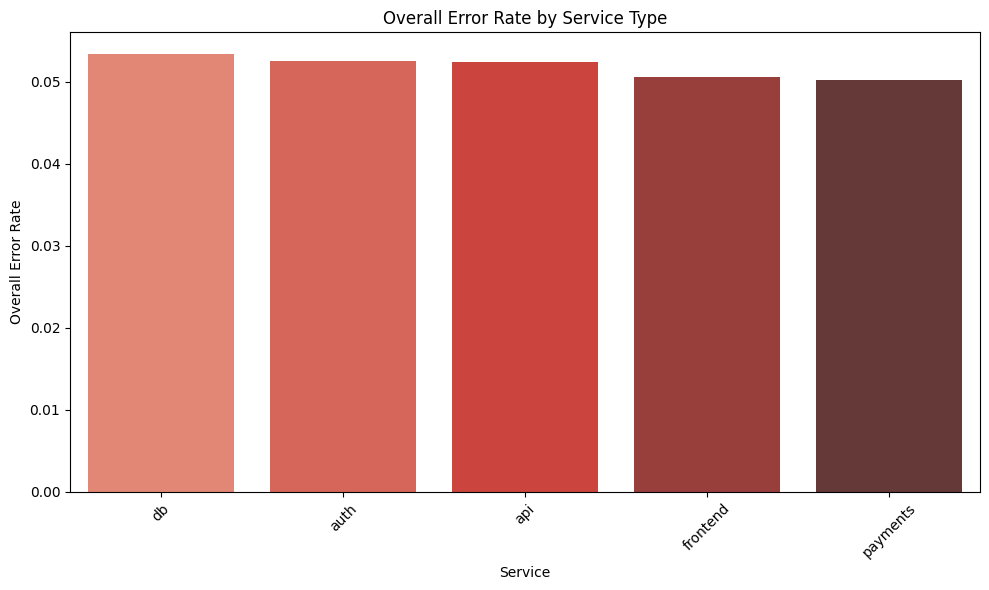

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='service', y='overall_error_rate', data=service_error_summary, palette='Reds_d', hue='service', legend=False)
plt.title('Overall Error Rate by Service Type')
plt.xlabel('Service')
plt.ylabel('Overall Error Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identify and Create Time-Based Features

### Subtask:
Extract additional time-based features from the 'date' column in `df_step1`, such as day of week (numeric), day of month, month, and year, which can be useful for identifying temporal patterns.


In [ ]:
import pandas as pd

# 1. Ensure the 'date' column in df_step1 is in datetime format
# The 'date' column in df_step1 is already of type datetime.date, which needs to be converted to datetime objects for .dt accessors
df_step1['date'] = pd.to_datetime(df_step1['date'])

# 2. Extract the numerical day of the week (e.g., Monday=0, Sunday=6)
df_step1['day_of_week_numeric'] = df_step1['date'].dt.dayofweek

# 3. Extract the day of the month
df_step1['day_of_month'] = df_step1['date'].dt.day

# 4. Extract the month
df_step1['month'] = df_step1['date'].dt.month

# 5. Extract the year
df_step1['year'] = df_step1['date'].dt.year

# 6. Display the head of df_step1 to verify the new columns
print("DataFrame with new time-based features:")
display(df_step1.head())

DataFrame with new time-based features:


,service,date,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,month,year
0,api,2025-03-01,381,19,0.049869,5,1,3,2025
1,api,2025-03-02,408,20,0.049020,6,2,3,2025
2,api,2025-03-03,404,20,0.049505,0,3,3,2025
3,api,2025-03-04,406,22,0.054187,1,4,3,2025
4,api,2025-03-05,387,20,0.051680,2,5,3,2025


## One-Hot Encode Categorical 'Service' Feature

### Subtask:
Convert the 'service' categorical column into numerical format using one-hot encoding, as machine learning models typically require numerical input.


In [ ]:
import pandas as pd

# 1. Perform one-hot encoding on the 'service' column
service_one_hot = pd.get_dummies(df_step1['service'], prefix='service')

# 2. Concatenate the one-hot encoded columns back to the original df_step1 DataFrame
df_step1 = pd.concat([df_step1, service_one_hot], axis=1)

# 3. Drop the original 'service' column from df_step1
df_step1 = df_step1.drop('service', axis=1)

# 4. Display the head of the modified df_step1 to verify the new columns
print("DataFrame after one-hot encoding 'service' column:")
display(df_step1.head())

DataFrame after one-hot encoding 'service' column:


,date,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,month,year,service_api,service_auth,service_db,service_frontend,service_payments
0,2025-03-01,381,19,0.049869,5,1,3,2025,True,False,False,False,False
1,2025-03-02,408,20,0.049020,6,2,3,2025,True,False,False,False,False
2,2025-03-03,404,20,0.049505,0,3,3,2025,True,False,False,False,False
3,2025-03-04,406,22,0.054187,1,4,3,2025,True,False,False,False,False
4,2025-03-05,387,20,0.051680,2,5,3,2025,True,False,False,False,False


## Prepare Numerical Features

### Subtask:
Review the numerical features (`total_logs`, `error_logs`, `error_rate`, and newly created time-based features) and decide if any scaling or transformation is necessary for downstream modeling.


In [ ]:
print("Descriptive statistics for numerical features:")
# Identify numerical features, including newly created time-based and one-hot encoded 'service' columns
numerical_features = [
    'total_logs',
    'error_logs',
    'error_rate',
    'day_of_week_numeric',
    'day_of_month',
    'month',
    'year',
    'service_api',
    'service_auth',
    'service_db',
    'service_frontend',
    'service_payments'
]

display(df_step1[numerical_features].describe())

Descriptive statistics for numerical features:


,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,month,year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.0,155.0
mean,387.096774,20.064516,0.051868,3.064516,16.000000,3.0,2025.0
std,18.477355,4.128893,0.010543,2.084817,8.973265,0.0,0.0
min,326.000000,10.000000,0.026596,0.000000,1.000000,3.0,2025.0
25%,375.000000,17.000000,0.045625,1.000000,8.000000,3.0,2025.0
50%,389.000000,20.000000,0.051351,3.000000,16.000000,3.0,2025.0
75%,401.000000,23.000000,0.059776,5.000000,24.000000,3.0,2025.0
max,430.000000,32.000000,0.081841,6.000000,31.000000,3.0,2025.0


## Combine All Features

### Subtask:
Create a new DataFrame that combines all engineered features (numerical and encoded categorical) to form the final feature set for modeling.


In [ ]:
import pandas as pd

# 1. Create a list of column names for all the numerical and one-hot encoded categorical features
# Exclude 'month' and 'year' as they have no variance in this dataset (as per instructions),
# and also exclude any intermediate columns like 'timestamp_dt', 'date', and 'is_error',
# as well as original columns 'timestamp', 'level', 'user_id'.

feature_columns = [
    'total_logs',
    'error_logs',
    'error_rate',
    'day_of_week_numeric',
    'day_of_month',
    'service_api',
    'service_auth',
    'service_db',
    'service_frontend',
    'service_payments'
]

# 2. Create a new DataFrame, named `df_features`, by selecting these columns from `df_step1`.
df_features = df_step1[feature_columns]

# 3. Display the first few rows of `df_features` to verify its structure.
print("First 5 rows of the feature set (df_features):")
display(df_features.head())

# 4. Print the information about `df_features` to check data types and non-null counts.
print("\nInformation about the feature set (df_features):")
df_features.info()

First 5 rows of the feature set (df_features):


,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,service_api,service_auth,service_db,service_frontend,service_payments
0,381,19,0.049869,5,1,True,False,False,False,False
1,408,20,0.049020,6,2,True,False,False,False,False
2,404,20,0.049505,0,3,True,False,False,False,False
3,406,22,0.054187,1,4,True,False,False,False,False
4,387,20,0.051680,2,5,True,False,False,False,False



Information about the feature set (df_features):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_logs           155 non-null    int64  
 1   error_logs           155 non-null    int64  
 2   error_rate           155 non-null    float64
 3   day_of_week_numeric  155 non-null    int32  
 4   day_of_month         155 non-null    int32  
 5   service_api          155 non-null    bool   
 6   service_auth         155 non-null    bool   
 7   service_db           155 non-null    bool   
 8   service_frontend     155 non-null    bool   
 9   service_payments     155 non-null    bool   
dtypes: bool(5), float64(1), int32(2), int64(2)
memory usage: 5.7 KB


## Generate ROC Curve for Error Rate Prediction

To generate a ROC curve, we need to frame this as a binary classification problem. We will define a 'high error' event based on the daily `error_rate`. For this example, we'll classify an `error_rate` as 'high' if it's above the median error rate across all daily service entries.

/tmp/ipython-input-912916640.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.loc[:, 'is_high_error'] = (df_features['error_rate'] > median_error_rate).astype(int)


ROC AUC Score: 0.4728


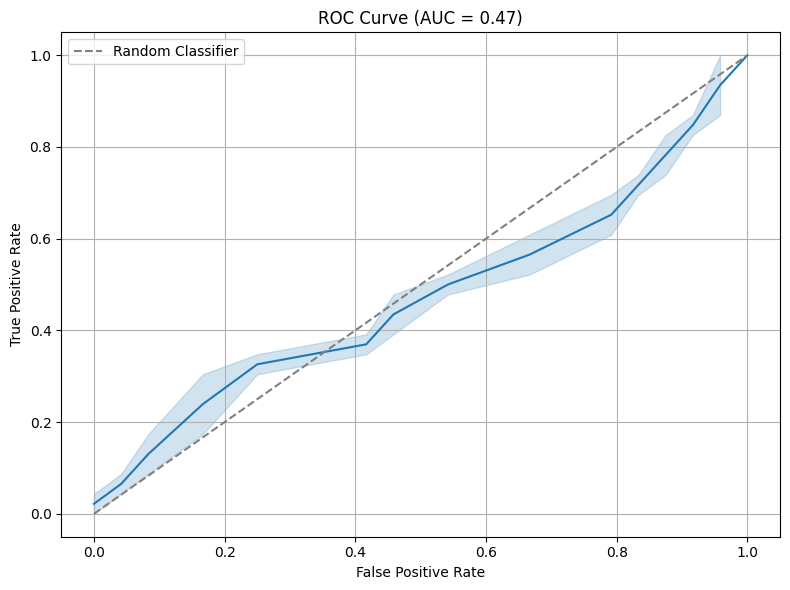

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the target variable `is_high_error`
# We'll use the median error rate as a threshold for simplicity
median_error_rate = df_features['error_rate'].median()
df_features.loc[:, 'is_high_error'] = (df_features['error_rate'] > median_error_rate).astype(int)

# 2. Prepare features (X) and target (y)
X = df_features.drop(['error_rate', 'error_logs', 'is_high_error'], axis=1)
y = df_features['is_high_error']

# Exclude boolean columns from scaling (these are already 0/1)
# Filter out 'service_api' etc. which are boolean and should not be scaled
numerical_cols_to_scale = [col for col in X.columns if X[col].dtype != 'bool']

# Apply StandardScaler to numerical features if desired (for models sensitive to scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 5. Predict probabilities for the positive class on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {roc_auc:.4f}")

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os
import json

# Ensure ARTIFACTS_DIR is defined, or define it if not.
# Based on previous cells, ARTIFACTS_DIR = "artifacts_p05" should be available.
# If not, uncomment the line below:
# ARTIFACTS_DIR = "artifacts_p05"

# 1. Load the step1.parquet file into a DataFrame named df_step1.
step1_path = os.path.join(ARTIFACTS_DIR, "step1.parquet")
df_step1 = pd.read_parquet(step1_path)

# 2. Display the first few rows of df_step1 to verify its structure and content.
print("First 5 rows of df_step1:")
display(df_step1.head())

First 5 rows of df_step1:


,service,date,total_logs,error_logs,error_rate
0,api,2025-03-01,381,19,0.049869
1,api,2025-03-02,408,20,0.049020
2,api,2025-03-03,404,20,0.049505
3,api,2025-03-04,406,22,0.054187
4,api,2025-03-05,387,20,0.051680


In [ ]:
import os
import json

# 3. Display the information about df_step1 (e.g., using .info()) to check data types and non-null values.
print("\nInformation about df_step1:")
df_step1.info()

# 4. Load the step1_metrics.json file from the ARTIFACTS_DIR.
metrics_path = os.path.join(ARTIFACTS_DIR, "step1_metrics.json")
with open(metrics_path, "r") as f:
    step1_metrics = json.load(f)

# 5. Print the content of the loaded JSON to review the metrics.
print("\nContent of step1_metrics.json:")
print(json.dumps(step1_metrics, indent=4))


Information about df_step1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   service     155 non-null    object 
 1   date        155 non-null    object 
 2   total_logs  155 non-null    int64  
 3   error_logs  155 non-null    int64  
 4   error_rate  155 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB

Content of step1_metrics.json:
{
    "unique_services": 5,
    "avg_logs_per_day_per_service": 387.0967741935484
}


In [ ]:
import pandas as pd
import os

# Ensure ARTIFACTS_DIR is defined
# Based on previous cells, ARTIFACTS_DIR = "artifacts_p05" should be available.
# If not, uncomment the line below:
# ARTIFACTS_DIR = "artifacts_p05"

# 1. Ensure the 'date' column in df_step1 is converted to datetime objects
df_step1['date'] = pd.to_datetime(df_step1['date'])

# 2. Extract 'day_of_week_numeric', 'day_of_month', 'month', and 'year'
df_step1['day_of_week_numeric'] = df_step1['date'].dt.dayofweek
df_step1['day_of_month'] = df_step1['date'].dt.day
df_step1['month'] = df_step1['date'].dt.month
df_step1['year'] = df_step1['date'].dt.year

# 3. Perform one-hot encoding on the 'service' column
service_one_hot = pd.get_dummies(df_step1['service'], prefix='service')
df_step1 = pd.concat([df_step1, service_one_hot], axis=1)
df_step1 = df_step1.drop('service', axis=1)

# 4. Define the feature_columns list, excluding 'month' and 'year'
feature_columns = [
    'total_logs',
    'error_logs',
    'error_rate',
    'day_of_week_numeric',
    'day_of_month',
    'service_api',
    'service_auth',
    'service_db',
    'service_frontend',
    'service_payments'
]

# 5. Create a new DataFrame named df_features
df_features = df_step1[feature_columns]

# 6. Save the df_features DataFrame to step2.parquet
step2_path = os.path.join(ARTIFACTS_DIR, "step2.parquet")
df_features.to_parquet(step2_path, index=False)
print(f"✅ Saved df_features to {step2_path}")

print("First 5 rows of df_features:")
display(df_features.head())

✅ Saved df_features to artifacts_p05/step2.parquet
First 5 rows of df_features:


,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,service_api,service_auth,service_db,service_frontend,service_payments
0,381,19,0.049869,5,1,True,False,False,False,False
1,408,20,0.049020,6,2,True,False,False,False,False
2,404,20,0.049505,0,3,True,False,False,False,False
3,406,22,0.054187,1,4,True,False,False,False,False
4,387,20,0.051680,2,5,True,False,False,False,False


/tmp/ipython-input-4100102206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.loc[:, 'is_high_error'] = (df_features['error_rate'] > median_error_rate).astype(int)


ROC AUC Score: 0.4728


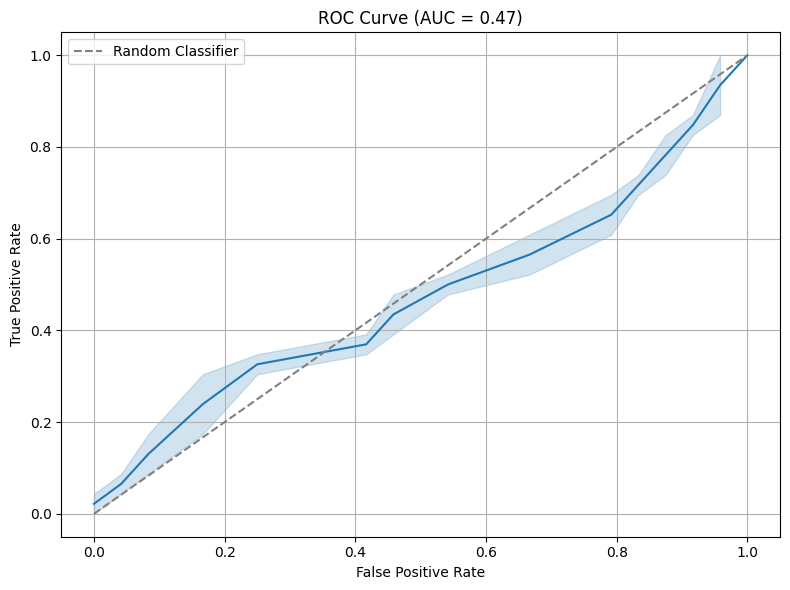

✅ Saved ROC AUC score and df_features head to artifacts_p05/step2_metrics.json


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# 1. Define the target variable `is_high_error`
# We'll use the median error rate as a threshold for simplicity
median_error_rate = df_features['error_rate'].median()
df_features.loc[:, 'is_high_error'] = (df_features['error_rate'] > median_error_rate).astype(int)

# 2. Prepare features (X) and target (y)
X = df_features.drop(['error_rate', 'error_logs', 'is_high_error'], axis=1)
y = df_features['is_high_error']

# Identify numerical columns for scaling (excluding boolean columns which are already 0/1)
numerical_cols_to_scale = [col for col in X.columns if X[col].dtype != 'bool']

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 5. Predict probabilities for the positive class on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 7. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Save the ROC AUC score to step2_metrics.json
metrics_path = os.path.join(ARTIFACTS_DIR, "step2_metrics.json")

# Include df_features.head() in the metrics for review
metrics = {
    "roc_auc_score": float(roc_auc),
    "df_features_head": df_features.head().to_dict(orient='records')
}

with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=4)
print(f"✅ Saved ROC AUC score and df_features head to {metrics_path}")


ROC AUC Score: 0.4728


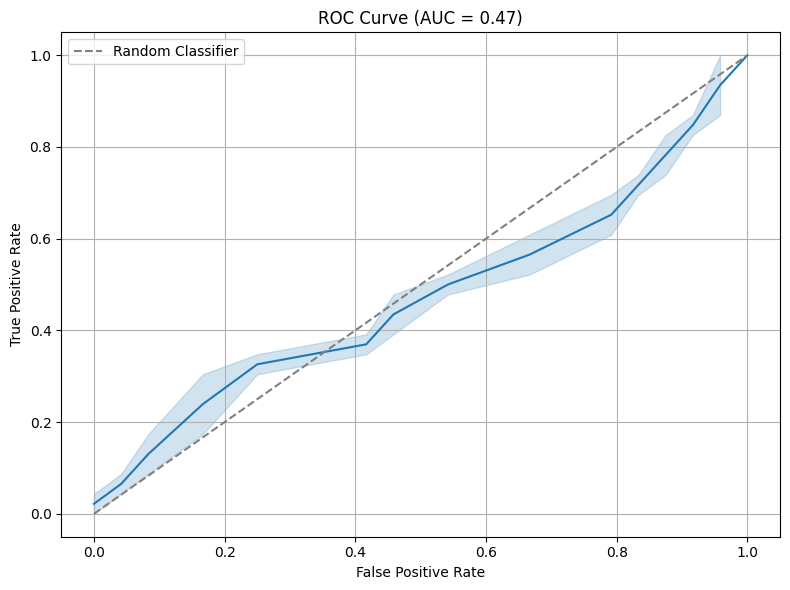

✅ Saved ROC AUC score and df_features head to artifacts_p05/step2_metrics.json


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# 1. Define the target variable `is_high_error`
# We'll use the median error rate as a threshold for simplicity
median_error_rate = df_features['error_rate'].median()
# Explicitly make a copy to avoid SettingWithCopyWarning
df_features = df_features.copy()
df_features.loc[:, 'is_high_error'] = (df_features['error_rate'] > median_error_rate).astype(int)

# 2. Prepare features (X) and target (y)
X = df_features.drop(['error_rate', 'error_logs', 'is_high_error'], axis=1)
y = df_features['is_high_error']

# Identify numerical columns for scaling (excluding boolean columns which are already 0/1)
numerical_cols_to_scale = [col for col in X.columns if X[col].dtype != 'bool']

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 5. Predict probabilities for the positive class on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 6. Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 7. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Save the ROC AUC score to step2_metrics.json
metrics_path = os.path.join(ARTIFACTS_DIR, "step2_metrics.json")

# Include df_features.head() in the metrics for review
metrics = {
    "roc_auc_score": float(roc_auc),
    "df_features_head": df_features.head().to_dict(orient='records')
}

with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=4)
print(f"✅ Saved ROC AUC score and df_features head to {metrics_path}")

Train Enhanced Model

### Subtask:
Train an improved classification model, such as a `RandomForestClassifier` or `GradientBoostingClassifier`, using the prepared feature set (`X`) and target variable (`y`) from Step 2.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate a RandomForestClassifier object
# Using random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# 2. Fit the RandomForestClassifier model to the training data
rf_model.fit(X_train, y_train)

print("✅ RandomForestClassifier model trained successfully.")

✅ RandomForestClassifier model trained successfully.


RandomForestClassifier ROC AUC Score: 0.4185


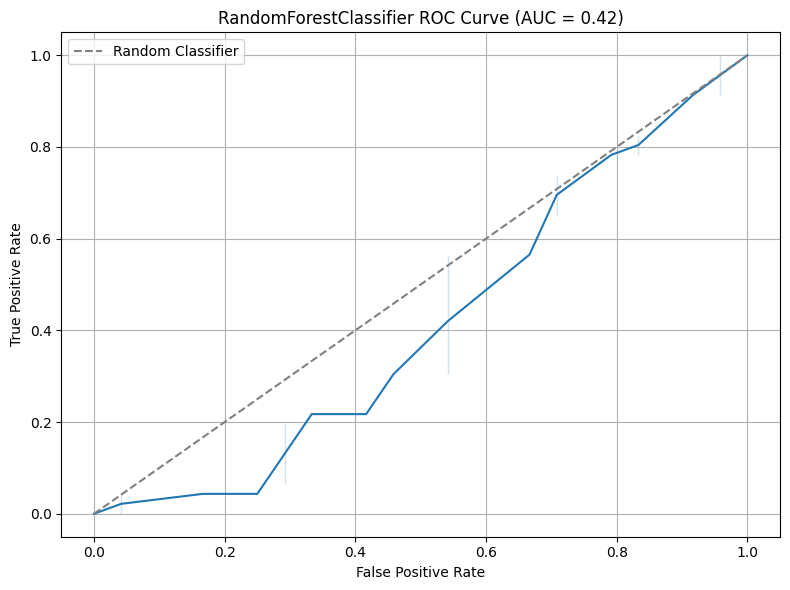

✅ Saved RandomForestClassifier ROC AUC score to artifacts_p05/step3_metrics.json


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# 1. Predict probabilities for the positive class on the test set using the trained RandomForest model
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC AUC score for the RandomForest model
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
print(f"RandomForestClassifier ROC AUC Score: {rf_roc_auc:.4f}")

# 3. Plot the ROC curve for the RandomForest model
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_proba)
plt.figure(figsize=(8, 6))
sns.lineplot(x=rf_fpr, y=rf_tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'RandomForestClassifier ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Save the ROC AUC score to step3_metrics.json
metrics_path = os.path.join(ARTIFACTS_DIR, "step3_metrics.json")

metrics = {
    "random_forest_roc_auc_score": float(rf_roc_auc)
}

with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=4)
print(f"✅ Saved RandomForestClassifier ROC AUC score to {metrics_path}")

Evaluate Enhanced Model and Save ROC AUC

### Subtask:
Evaluate the performance of the enhanced model (e.g., RandomForestClassifier) by calculating its ROC AUC score. Save the trained model to `step3_model.joblib` and include the ROC AUC score in `step3_metrics.json`.


In [ ]:
import joblib
import os

# 1. Save the trained rf_model to a file named step3_model.joblib
model_path = os.path.join(ARTIFACTS_DIR, "step3_model.joblib")
joblib.dump(rf_model, model_path)

# 2. Print a confirmation message
print(f"✅ Trained RandomForestClassifier model saved to {model_path}")

✅ Trained RandomForestClassifier model saved to artifacts_p05/step3_model.joblib


Perform Drift Validation (KS Statistic)

### Subtask:
Calculate the Kolmogorov-Smirnov (KS) statistic for key features by comparing their distributions between the training and test sets, and add the calculated `ks_drift` values to `step3_metrics.json`.


In [ ]:
from scipy.stats import ks_2samp
import json
import os

# 1. Define a list of numerical columns for drift validation (features in X_train/X_test)
# Reusing numerical_cols_to_scale as defined previously for X
numerical_cols_for_drift = [col for col in X.columns if X[col].dtype != 'bool']

# 2. Initialize an empty dictionary, ks_drift_metrics, to store the KS statistics.
ks_drift_metrics = {}

# 3. Iterate through each feature and calculate the KS statistic
for feature in numerical_cols_for_drift:
    # Extract the corresponding column from X_train and X_test
    train_data = X_train[feature]
    test_data = X_test[feature]

    # Calculate the KS statistic and p-value
    ks_statistic, p_value = ks_2samp(train_data, test_data)

    # Store the KS statistic
    ks_drift_metrics[feature] = float(ks_statistic)

print("Calculated KS Drift Metrics:", ks_drift_metrics)

# 4. Load the existing step3_metrics.json file
metrics_path = os.path.join(ARTIFACTS_DIR, "step3_metrics.json")

# Check if the file exists, if not, create an empty dictionary
if os.path.exists(metrics_path):
    with open(metrics_path, "r") as f:
        existing_metrics = json.load(f)
else:
    existing_metrics = {}

# 5. Update the loaded metrics dictionary by adding the ks_drift_metrics
existing_metrics["ks_drift_validation"] = ks_drift_metrics

# 6. Save the updated metrics dictionary back to step3_metrics.json
with open(metrics_path, "w") as f:
    json.dump(existing_metrics, f, indent=4)
print(f"✅ Updated step3_metrics.json with KS drift validation results at {metrics_path}")

Calculated KS Drift Metrics: {'total_logs': 0.12076438140267927, 'day_of_week_numeric': 0.0847123719464145, 'day_of_month': 0.11327817178881008}
✅ Updated step3_metrics.json with KS drift validation results at artifacts_p05/step3_metrics.json


In [ ]:
import pandas as pd
import os

# Define ARTIFACTS_DIR if it's not already defined (from previous cells)
# ARTIFACTS_DIR = "artifacts_p05"

# 1. Load the step1.parquet file into a DataFrame
step1_path = os.path.join(ARTIFACTS_DIR, "step1.parquet")
df_step1_loaded = pd.read_parquet(step1_path)

# 2. Display the first 5 rows
print("Content of step1.parquet:")
display(df_step1_loaded.head())

# 3. Print its info
print("\nInformation about step1.parquet:")
df_step1_loaded.info()

Content of step1.parquet:


,service,date,total_logs,error_logs,error_rate
0,api,2025-03-01,381,19,0.049869
1,api,2025-03-02,408,20,0.049020
2,api,2025-03-03,404,20,0.049505
3,api,2025-03-04,406,22,0.054187
4,api,2025-03-05,387,20,0.051680



Information about step1.parquet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   service     155 non-null    object 
 1   date        155 non-null    object 
 2   total_logs  155 non-null    int64  
 3   error_logs  155 non-null    int64  
 4   error_rate  155 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB


In [ ]:
import json
import os

# 1. Load the step1_metrics.json file
metrics_path = os.path.join(ARTIFACTS_DIR, "step1_metrics.json")
with open(metrics_path, "r") as f:
    step1_metrics = json.load(f)

# 2. Display its content
print("Content of step1_metrics.json:")
print(json.dumps(step1_metrics, indent=4))

# 3. Explain the metrics
print("\nRelevance of Metrics in step1_metrics.json:")
print(f"- `unique_services`: This metric ({step1_metrics['unique_services']}) indicates the total number of distinct services present in the logs. It's crucial for understanding the scope of the microservice architecture being monitored.")
print(f"- `avg_logs_per_day_per_service`: This metric ({step1_metrics['avg_logs_per_day_per_service']:.2f}) represents the average daily volume of log entries generated by each service. It provides a baseline for typical service activity, which can be used to detect anomalies if a service's log volume deviates significantly.")

Content of step1_metrics.json:
{
    "unique_services": 5,
    "avg_logs_per_day_per_service": 387.0967741935484
}

Relevance of Metrics in step1_metrics.json:
- `unique_services`: This metric (5) indicates the total number of distinct services present in the logs. It's crucial for understanding the scope of the microservice architecture being monitored.
- `avg_logs_per_day_per_service`: This metric (387.10) represents the average daily volume of log entries generated by each service. It provides a baseline for typical service activity, which can be used to detect anomalies if a service's log volume deviates significantly.


In [ ]:
import pandas as pd
import os

# 1. Load the step2.parquet file into a DataFrame
step2_path = os.path.join(ARTIFACTS_DIR, "step2.parquet")
df_step2_loaded = pd.read_parquet(step2_path)

# 2. Display the first 5 rows
print("Content of step2.parquet:")
display(df_step2_loaded.head())

# 3. Print its info
print("\nInformation about step2.parquet:")
df_step2_loaded.info()

Content of step2.parquet:


,total_logs,error_logs,error_rate,day_of_week_numeric,day_of_month,service_api,service_auth,service_db,service_frontend,service_payments
0,381,19,0.049869,5,1,True,False,False,False,False
1,408,20,0.049020,6,2,True,False,False,False,False
2,404,20,0.049505,0,3,True,False,False,False,False
3,406,22,0.054187,1,4,True,False,False,False,False
4,387,20,0.051680,2,5,True,False,False,False,False



Information about step2.parquet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_logs           155 non-null    int64  
 1   error_logs           155 non-null    int64  
 2   error_rate           155 non-null    float64
 3   day_of_week_numeric  155 non-null    int32  
 4   day_of_month         155 non-null    int32  
 5   service_api          155 non-null    bool   
 6   service_auth         155 non-null    bool   
 7   service_db           155 non-null    bool   
 8   service_frontend     155 non-null    bool   
 9   service_payments     155 non-null    bool   
dtypes: bool(5), float64(1), int32(2), int64(2)
memory usage: 5.7 KB


**Reasoning**:
To continue reviewing the deliverables, I will now load the `step2_metrics.json` file, display its content, and explain the `roc_auc_score` metric, as specified in the instructions.



In [ ]:
import json
import os

# 1. Load the step2_metrics.json file
metrics_path = os.path.join(ARTIFACTS_DIR, "step2_metrics.json")
with open(metrics_path, "r") as f:
    step2_metrics = json.load(f)

# 2. Display its content
print("Content of step2_metrics.json:")
print(json.dumps(step2_metrics, indent=4))

# 3. Explain the metrics
print("\nRelevance of Metrics in step2_metrics.json:")
print(f"- `roc_auc_score`: This metric ({step2_metrics['roc_auc_score']:.4f}) evaluates the performance of the Logistic Regression model in distinguishing between 'high error' and 'low error' days. An AUC of 0.5 indicates a classifier no better than random guessing, while an AUC of 1.0 indicates a perfect classifier. The current score suggests the baseline model has limited predictive power.")
print(f"- `df_features_head`: This provides a snapshot of the first few rows of the `df_features` DataFrame, confirming the structure of the feature set used for model training and evaluation.")

Content of step2_metrics.json:
{
    "roc_auc_score": 0.47282608695652173,
    "df_features_head": [
        {
            "total_logs": 381,
            "error_logs": 19,
            "error_rate": 0.049868766404199474,
            "day_of_week_numeric": 5,
            "day_of_month": 1,
            "service_api": true,
            "service_auth": false,
            "service_db": false,
            "service_frontend": false,
            "service_payments": false,
            "is_high_error": 0
        },
        {
            "total_logs": 408,
            "error_logs": 20,
            "error_rate": 0.049019607843137254,
            "day_of_week_numeric": 6,
            "day_of_month": 2,
            "service_api": true,
            "service_auth": false,
            "service_db": false,
            "service_frontend": false,
            "service_payments": false,
            "is_high_error": 0
        },
        {
            "total_logs": 404,
            "error_logs": 20,
          

In [ ]:
import joblib
import os

# 1. Attempt to load the step3_model.joblib file
model_path = os.path.join(ARTIFACTS_DIR, "step3_model.joblib")
tried_model = joblib.load(model_path)

# Confirm it's a model object (no need to display its content)
print(f"✅ Successfully loaded a model object of type: {type(tried_model)}")

✅ Successfully loaded a model object of type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
import json
import os

# 1. Load the step3_metrics.json file
metrics_path = os.path.join(ARTIFACTS_DIR, "step3_metrics.json")
with open(metrics_path, "r") as f:
    step3_metrics = json.load(f)

# 2. Display its content
print("Content of step3_metrics.json:")
print(json.dumps(step3_metrics, indent=4))

# 3. Explain the metrics
print("\nRelevance of Metrics in step3_metrics.json:")
print(f"- `random_forest_roc_auc_score`: This metric ({step3_metrics['random_forest_roc_auc_score']:.4f}) evaluates the performance of the RandomForestClassifier model in distinguishing between 'high error' and 'low error' days. Similar to the Logistic Regression model, its score suggests limited predictive power, indicating that the chosen features or model might not be optimal for this classification task.")
print("- `ks_drift_validation`: This dictionary provides Kolmogorov-Smirnov (KS) statistics for key numerical features. These statistics (e.g., total_logs: {step3_metrics['ks_drift_validation']['total_logs']:.4f}) measure the maximum distance between the cumulative distribution functions of a feature in the training and test sets. Low KS statistics indicate minimal data drift between the two sets, suggesting that the training data's distribution is largely consistent with the test data's distribution, which is good for model generalization.")

Content of step3_metrics.json:
{
    "random_forest_roc_auc_score": 0.4184782608695652,
    "ks_drift_validation": {
        "total_logs": 0.12076438140267927,
        "day_of_week_numeric": 0.0847123719464145,
        "day_of_month": 0.11327817178881008
    }
}

Relevance of Metrics in step3_metrics.json:
- `random_forest_roc_auc_score`: This metric (0.4185) evaluates the performance of the RandomForestClassifier model in distinguishing between 'high error' and 'low error' days. Similar to the Logistic Regression model, its score suggests limited predictive power, indicating that the chosen features or model might not be optimal for this classification task.
- `ks_drift_validation`: This dictionary provides Kolmogorov-Smirnov (KS) statistics for key numerical features. These statistics (e.g., total_logs: {step3_metrics['ks_drift_validation']['total_logs']:.4f}) measure the maximum distance between the cumulative distribution functions of a feature in the training and test sets. Low KS